In [1]:
cd

/home/luxx0489


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import mne
from scipy.io import loadmat, savemat
from scipy.stats import circmean
from sklearn import decomposition
from random import sample

In [5]:
data_path = './jupyter_projects/StreamingEEG_exp5/'
folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_100_200Hz/"

mask_ch = np.ones(64,dtype=bool)
mask_ch[27] = False

file_handle = open(data_path +'electrode_pos.obj','rb')
pos = pickle.load(file_handle)[mask_ch,:]
file_handle.close()

ID_list = np.arange(2,18)
mask = np.ones(len(ID_list),dtype=bool)
mask[3] = False

sample_size = [300,600,900]

In [6]:
# load data

rep_size = 20

plv_out = np.empty((15,2,len(sample_size),rep_size,4,224))
ID_list = np.arange(2,18)
mask = np.ones(len(ID_list),dtype=bool)
mask[3] = False

Ref_list = ['M12','AVE']


mask_ch = np.ones(64,dtype=bool)
mask_ch[27] = False

for iSubject in range(len(ID_list[mask])):
    print(str(iSubject))
    
    for iRef in range(2):
        
        # read data
        sub_id = 'Sub' + str(ID_list[mask][iSubject])
        mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_LF_'+Ref_list[iRef]
                               +'_Ref_REcleaned.mat')
        ind_list = [sample(range(1500),size) for size in sample_size]
        if iRef==0:
            data = mat_contents['Merged_Data'][mask_ch,103:103+446,:]
        else:
            data = mat_contents['Merged_Data'][:,103:103+446,:]
        nTrial = data.shape[2]

        # FFT
        x=data.transpose(2,0,1)
        xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
        xw = xw/abs(xw)
        freq = np.fft.rfftfreq(x.shape[2],1/1024)

        for iSize in range(len(sample_size)):
            
            for iRep in range(rep_size):
                ind_sample = sample(range(1500),sample_size[iSize])
                plv_ave = xw[ind_sample,:,:].mean(0)
                plv_out[iSubject,iRef,iSize,iRep,0,:] = abs(plv_ave).mean(0)
                plv_out[iSubject,iRef,iSize,iRep,1,:] = abs(plv_ave[37,:])

                # cPCA
                plv_mat=np.empty((63,xw.shape[2]),dtype=np.complex64)
                v_mat = []
                for iFreq in range(xw.shape[2]):
                    csd = np.matmul(xw[ind_sample,:,iFreq].T,xw[ind_sample,:,iFreq].conj())
                    w,v = np.linalg.eig(csd)
                    v_mat.append(v)
                    pc = np.matmul(v.conj().T,xw[ind_sample,:,iFreq].T)
                    plv = (pc/abs(pc)).mean(1)
                    plv_mat[:,iFreq] = plv

                plv_out[iSubject,iRef,iSize,iRep,2,:] = abs(plv_mat[0,:])

                # concatenate and tPCA
                mix_long = np.concatenate([x[iTrial,:,:] for iTrial in ind_sample], axis=1)

                pca = decomposition.PCA(n_components=1)
                pca.fit(mix_long.T)
                pc_t = np.empty((len(ind_list[iSize]),446))
                for iTrial in range(len(ind_sample)):
                    pc_t[iTrial,:] = pca.transform(x[ind_sample[iTrial],:,:].T).squeeze()
                xw_pc_t = np.fft.rfft(pc_t, axis=1)
                xw_pc_t = xw_pc_t/abs(xw_pc_t)
                plv_pc_t = xw_pc_t.mean(0)

                plv_out[iSubject,iRef,iSize,iRep,3,:] = abs(plv_pc_t)

plv_out_LF = plv_out


file_handle = open(folder_path + '/plv_LF_Bootstrap.obj','wb')
pickle.dump(plv_out_LF, file_handle)
file_handle.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [7]:
# load data

rep_size = 20

plv_out = np.empty((15,2,len(sample_size),rep_size,4,224))
ID_list = np.arange(2,18)
mask = np.ones(len(ID_list),dtype=bool)
mask[3] = False

Ref_list = ['M12','AVE']


mask_ch = np.ones(64,dtype=bool)
mask_ch[27] = False

for iSubject in range(len(ID_list[mask])):
    print(str(iSubject))
    
    for iRef in range(2):
        
        # read data
        sub_id = 'Sub' + str(ID_list[mask][iSubject])
        mat_contents = loadmat(folder_path + sub_id+'/'+sub_id+'_TMR-5_MSK_HF_'+Ref_list[iRef]
                               +'_Ref_REcleaned.mat')
        ind_list = [sample(range(1500),size) for size in sample_size]
        if iRef==0:
            data = mat_contents['Merged_Data'][mask_ch,103:103+446,:]
        else:
            data = mat_contents['Merged_Data'][:,103:103+446,:]
        nTrial = data.shape[2]

        # FFT
        x=data.transpose(2,0,1)
        xw = np.fft.rfft(np.hamming(x.shape[2])*x, axis=2)
        xw = xw/abs(xw)
        freq = np.fft.rfftfreq(x.shape[2],1/1024)

        for iSize in range(len(sample_size)):
            
            for iRep in range(rep_size):
                ind_sample = sample(range(1500),sample_size[iSize])
                plv_ave = xw[ind_sample,:,:].mean(0)
                plv_out[iSubject,iRef,iSize,iRep,0,:] = abs(plv_ave).mean(0)
                plv_out[iSubject,iRef,iSize,iRep,1,:] = abs(plv_ave[37,:])

                # cPCA
                plv_mat=np.empty((63,xw.shape[2]),dtype=np.complex64)
                v_mat = []
                for iFreq in range(xw.shape[2]):
                    csd = np.matmul(xw[ind_sample,:,iFreq].T,xw[ind_sample,:,iFreq].conj())
                    w,v = np.linalg.eig(csd)
                    v_mat.append(v)
                    pc = np.matmul(v.conj().T,xw[ind_sample,:,iFreq].T)
                    plv = (pc/abs(pc)).mean(1)
                    plv_mat[:,iFreq] = plv

                plv_out[iSubject,iRef,iSize,iRep,2,:] = abs(plv_mat[0,:])

                # concatenate and tPCA
                mix_long = np.concatenate([x[iTrial,:,:] for iTrial in ind_sample], axis=1)

                pca = decomposition.PCA(n_components=1)
                pca.fit(mix_long.T)
                pc_t = np.empty((len(ind_list[iSize]),446))
                for iTrial in range(len(ind_sample)):
                    pc_t[iTrial,:] = pca.transform(x[ind_sample[iTrial],:,:].T).squeeze()
                xw_pc_t = np.fft.rfft(pc_t, axis=1)
                xw_pc_t = xw_pc_t/abs(xw_pc_t)
                plv_pc_t = xw_pc_t.mean(0)

                plv_out[iSubject,iRef,iSize,iRep,3,:] = abs(plv_pc_t)

plv_out_HF = plv_out


file_handle = open(folder_path + '/plv_HF_Bootstrap.obj','wb')
pickle.dump(plv_out_HF, file_handle)
file_handle.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [8]:
file_handle = open(folder_path + '/plv_LF_Bootstrap.obj','rb')
plv_out = pickle.load(file_handle)
file_handle.close()

([<matplotlib.axis.XTick at 0x7ffb286f6410>,
 <a list of 3 Text xticklabel objects>)

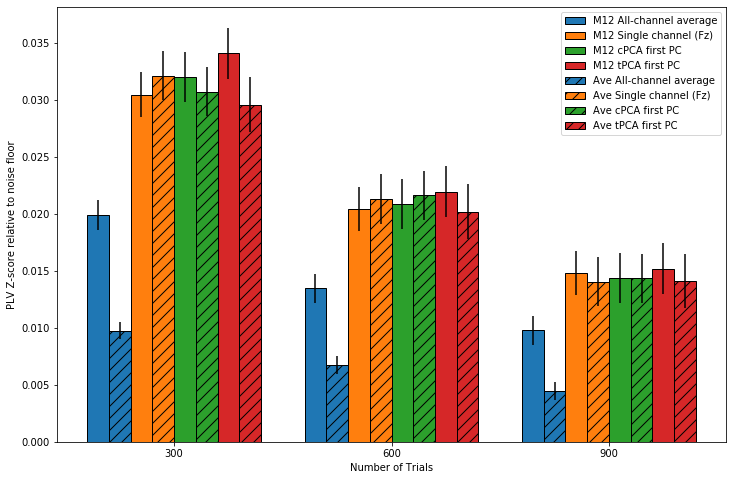

In [9]:
index_1 = np.argmin(abs(freq-98))


plv_n = np.empty((15, 2, 3, 4))

for iMethod in range(4):
    for iSize in range(3):
        for iRef in range(2):
            for iSubject in range(15):
                signal = plv_out[iSubject,iRef,iSize,:,iMethod,index_1]
                plv_n[iSubject,iRef,iSize,iMethod] = signal.std()

plt.figure(figsize=(12,8))
         
width = 30    
    
lgd_list=['All-channel average','Single channel (Fz)','cPCA first PC','tPCA first PC']


for i in range(4):
    x_tick=[size+i*width*2-width*4 for size in sample_size]
    plt.bar(x_tick,plv_n[:,0,:,i].mean(0),width,yerr=plv_n[:,0,:,i].std()/np.sqrt(15)
                 ,label='M12 '+ lgd_list[i],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            edgecolor='black',align='edge')

for i in range(4):
    x_tick=[size+i*width*2-width*3 for size in sample_size]
    plt.bar(x_tick,plv_n[:,1,:,i].mean(0),width,yerr=plv_n[:,1,:,i].std()/np.sqrt(15)
                 ,label='Ave ' + lgd_list[i],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            hatch='//', edgecolor='black',align='edge')
plt.legend()
plt.xlabel('Number of Trials')
plt.ylabel('PLV Z-score relative to noise floor')
plt.xticks(sample_size)

In [15]:
file_handle = open(folder_path + '/plv_HF_Bootstrap.obj','rb')
plv_out = pickle.load(file_handle)
file_handle.close()

([<matplotlib.axis.XTick at 0x7ffb2827ed90>,
 <a list of 3 Text xticklabel objects>)

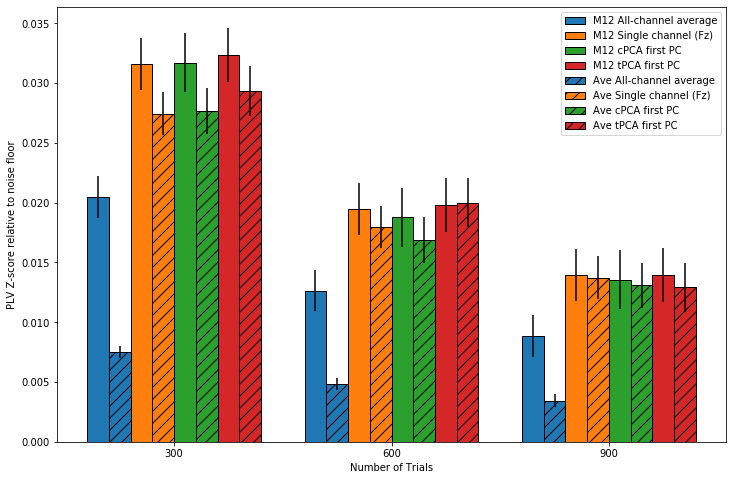

In [16]:
index_1 = np.argmin(abs(freq-233))


plv_n = np.empty((15, 2, 3, 4))

for iMethod in range(4):
    for iSize in range(3):
        for iRef in range(2):
            for iSubject in range(15):
                signal = plv_out[iSubject,iRef,iSize,:,iMethod,index_1]
                plv_n[iSubject,iRef,iSize,iMethod] = signal.std()

plt.figure(figsize=(12,8))
         
width = 30    
    
lgd_list=['All-channel average','Single channel (Fz)','cPCA first PC','tPCA first PC']


for i in range(4):
    x_tick=[size+i*width*2-width*4 for size in sample_size]
    plt.bar(x_tick,plv_n[:,0,:,i].mean(0),width,yerr=plv_n[:,0,:,i].std()/np.sqrt(15)
                 ,label='M12 '+ lgd_list[i],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            edgecolor='black',align='edge')

for i in range(4):
    x_tick=[size+i*width*2-width*3 for size in sample_size]
    plt.bar(x_tick,plv_n[:,1,:,i].mean(0),width,yerr=plv_n[:,1,:,i].std()/np.sqrt(15)
                 ,label='Ave ' + lgd_list[i],color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
            hatch='//', edgecolor='black',align='edge')
plt.legend()
plt.xlabel('Number of Trials')
plt.ylabel('PLV Z-score relative to noise floor')
plt.xticks(sample_size)